<a href="https://colab.research.google.com/github/Siddu123421/Smart-Traffic-Management-System/blob/main/Smart_Traffic_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time
from IPython.display import clear_output
# Initialize
np.random.seed(42)
print("Environment setup complete.")

Environment setup complete.


In [5]:
# 2. Simulate IoT Sensor Readings
def generate_sensor_data(samples=200):
    """Generate random vehicle counts per lane."""
    data = {
        "Time": np.arange(1, samples + 1),
        "Lane1": np.random.randint(10, 120, samples),
        "Lane2": np.random.randint(5, 100, samples),
        "Lane3": np.random.randint(8, 110, samples),
        "Lane4": np.random.randint(6, 90, samples),
    }
    return pd.DataFrame(data)


traffic_df = generate_sensor_data()
print("✅ IoT data simulated successfully.")

✅ IoT data simulated successfully.


In [6]:
# 3. Process and Label Data
traffic_df["Total_Vehicles"] = traffic_df[["Lane1", "Lane2", "Lane3", "Lane4"]].sum(axis=1)
traffic_df["Avg_Vehicles"] = traffic_df["Total_Vehicles"] / 4

bins = [0, 40, 80, 120]
labels = ["Low", "Medium", "High"]
traffic_df["Congestion_Level"] = pd.cut(traffic_df["Avg_Vehicles"], bins=bins, labels=labels)

print("✅ Data processing complete.")
traffic_df.head()

✅ Data processing complete.


,Time,Lane1,Lane2,Lane3,Lane4,Total_Vehicles,Avg_Vehicles,Congestion_Level
0,1,112,66,54,69,301,75.25,Medium
1,2,61,61,93,54,269,67.25,Medium
2,3,102,10,30,41,183,45.75,Medium
3,4,24,32,73,87,216,54.00,Medium
4,5,116,32,34,29,211,52.75,Medium


In [7]:
# 4. Train a Simple AI Model
# Assume signal duration (target) increases with avg vehicles
traffic_df["Signal_Duration"] = 20 + 0.3 * traffic_df["Avg_Vehicles"] + np.random.randn(200) * 2

X = traffic_df[["Avg_Vehicles"]]
y = traffic_df["Signal_Duration"]

model = LinearRegression()
model.fit(X, y)

preds = model.predict(X)
print("Model trained. R² Score:", round(r2_score(y, preds), 3))

Model trained. R² Score: 0.823


In [10]:
# 5. Define Decision Logic
def suggest_signal_time(avg_vehicles):
    """Return signal control suggestion based on traffic load."""
    est_time = model.predict(pd.DataFrame({"Avg_Vehicles": [avg_vehicles]}))[0]
    if avg_vehicles < 40:
        return f"Low Traffic → Keep default 20s"
    elif avg_vehicles < 80:
        return f"Moderate Traffic → Extend green to {est_time:.1f}s"
    else:
        return f"High Traffic → Delay clearance, green ≈ {est_time:.1f}s"

# Test decision logic
for avg in [25, 55, 95]:
    print(f"Avg Vehicles: {avg} → {suggest_signal_time(avg)}")

Avg Vehicles: 25 → Low Traffic → Keep default 20s
Avg Vehicles: 55 → Moderate Traffic → Extend green to 36.4s
Avg Vehicles: 95 → High Traffic → Delay clearance, green ≈ 49.0s


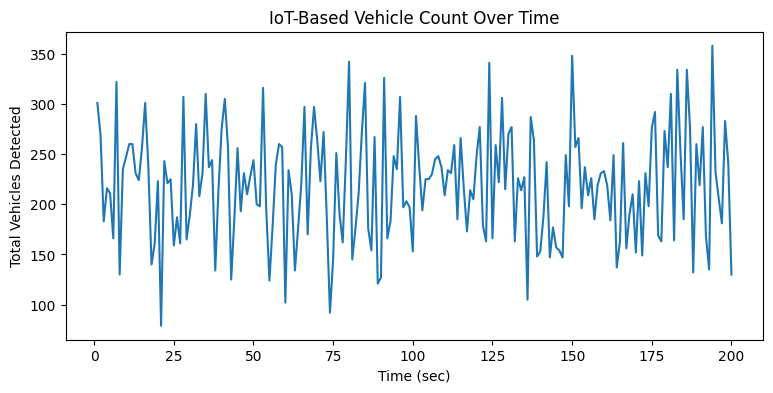

In [11]:
# 6. Visualization
plt.figure(figsize=(9, 4))
sns.lineplot(x="Time", y="Total_Vehicles", data=traffic_df)
plt.title("IoT-Based Vehicle Count Over Time")
plt.xlabel("Time (sec)")
plt.ylabel("Total Vehicles Detected")
plt.show()

Time Step: 86 | Avg Vehicles: 44.0
Moderate Traffic → Extend green to 32.9s


/tmp/ipython-input-884480363.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Time Step: {int(sample.Time)} | Avg Vehicles: {avg_v:.1f}")


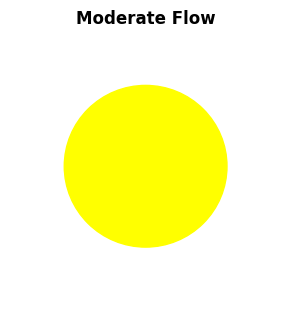

In [12]:
# 7. Real-Time Simulation Dashboard
def traffic_dashboard(avg_vehicles):
    """Display color-coded traffic light."""
    if avg_vehicles < 40:
        color, msg = "green", "Smooth Flow"
    elif avg_vehicles < 80:
        color, msg = "yellow", "Moderate Flow"
    else:
        color, msg = "red", "Heavy Congestion"

    fig, ax = plt.subplots(figsize=(3.5, 3.5))
    circle = plt.Circle((0.5, 0.5), 0.3, color=color)
    ax.add_artist(circle)
    ax.axis("off")
    plt.title(msg, fontsize=12, weight="bold")
    plt.show()

for _ in range(8):
    sample = traffic_df.sample(1)
    avg_v = sample["Avg_Vehicles"].values[0]
    clear_output(wait=True)
    print(f"Time Step: {int(sample.Time)} | Avg Vehicles: {avg_v:.1f}")
    print(suggest_signal_time(avg_v))
    traffic_dashboard(avg_v)
    time.sleep(1.2)

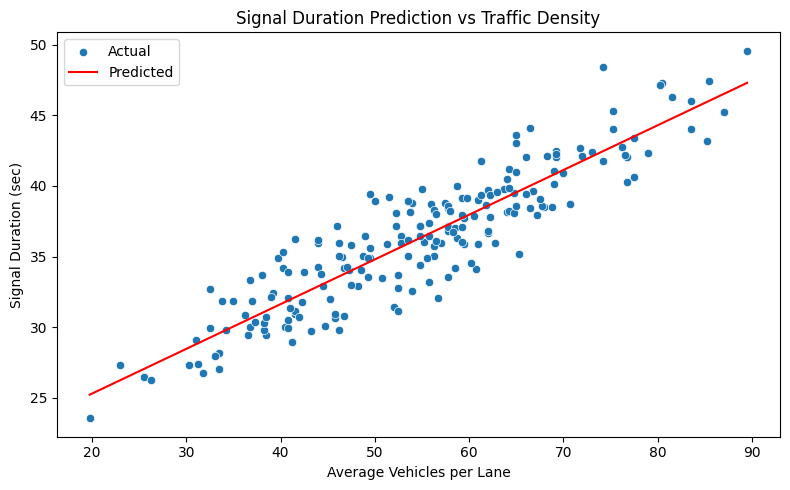


-------------------------------------------------
✅ Simulation Complete
• Dataset saved: smart_traffic_dataset.csv
• Graph saved: traffic_signal_analysis.png
-------------------------------------------------



In [13]:
# 8. Export Report and Visualization
traffic_df["Predicted_Signal"] = model.predict(traffic_df[["Avg_Vehicles"]])
traffic_df.to_csv("smart_traffic_dataset.csv", index=False)

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Avg_Vehicles", y="Signal_Duration", data=traffic_df, label="Actual")
sns.lineplot(x="Avg_Vehicles", y="Predicted_Signal", data=traffic_df, color="red", label="Predicted")
plt.title("Signal Duration Prediction vs Traffic Density")
plt.xlabel("Average Vehicles per Lane")
plt.ylabel("Signal Duration (sec)")
plt.legend()
plt.tight_layout()
plt.savefig("traffic_signal_analysis.png", dpi=300)
plt.show()

print("""
-------------------------------------------------
✅ Simulation Complete
• Dataset saved: smart_traffic_dataset.csv
• Graph saved: traffic_signal_analysis.png
-------------------------------------------------
""")